<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



### Task 1: Become familiar with the dataset


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-6eadaeeb1847>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


### TASK 2 : Generate Descriptive Statistics and Visualizations

#### Q1 For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 0, 'MEDV')

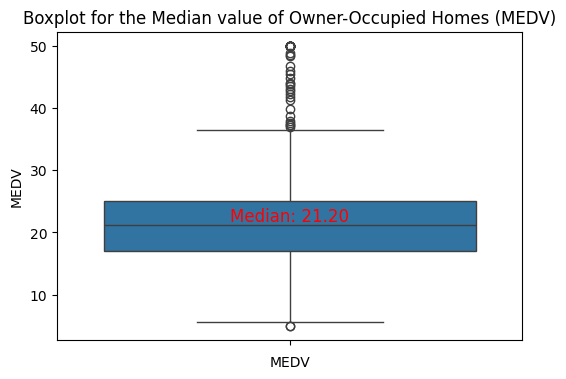

In [5]:
# Calculate the median value
median_value = np.median(boston_df['MEDV'])

# Create the boxplot for the 'MEDV' column
plt.figure(figsize=(6, 4))  # Optional: set the figure size
sns.boxplot(y=boston_df['MEDV'])
# Customize plot
plt.title("Boxplot for the Median value of Owner-Occupied Homes (MEDV)")
plt.text(0, median_value, f'Median: {median_value:.2f}', horizontalalignment='center', verticalalignment='bottom', color='red', fontsize=12)
plt.xlabel("MEDV")

FINDINGS:

1 - There is a significant presence of outliers, as evidenced by the numerous data points beyond the whiskers.

2 - The boxplot suggests that the median value of owner-occupied homes is around 21.20, but there is a significant degree of variation in the data, with some homes being much more expensive than others.

#### Q2 - Provide a  bar plot for the Charles river variable

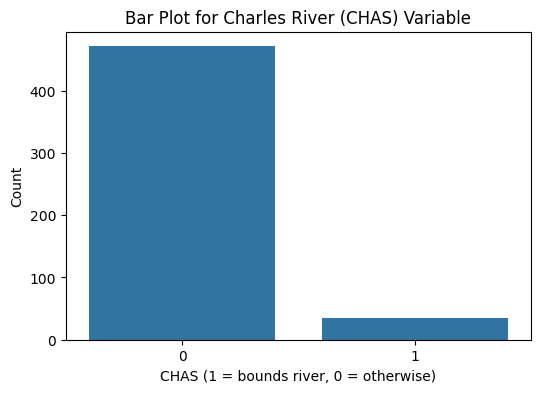

In [6]:

# Convert CHAS column to integers (if it is a string type)
boston_df['CHAS'] = boston_df['CHAS'].astype(int)

# Create a bar plot for the 'CHAS' column
plt.figure(figsize=(6, 4))  # Optional: set the figure size
sns.countplot(x=boston_df['CHAS'])

# Customize plot
plt.title("Bar Plot for Charles River (CHAS) Variable")
plt.xlabel("CHAS (1 = bounds river, 0 = otherwise)")
plt.ylabel("Count")

# Show the plot
plt.show()

FINDINGS:

1 - The bar plot clearly shows that the majority of houses in your dataset are not bounded by the Charles River (value "0").

2 - Only a small proportion of houses are located along the river (value "1").

#### Q3 - Provide a boxplot for the MEDV variable vs the AGE variable. 


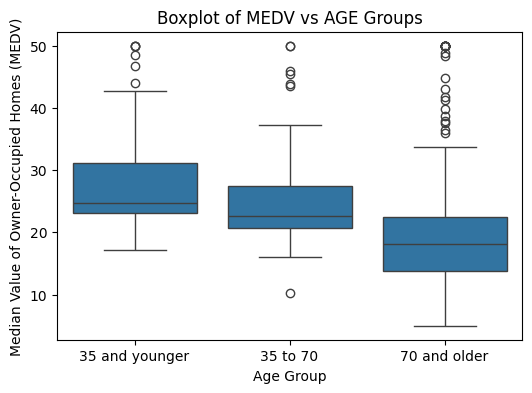

In [7]:
####(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
bins = [0, 35, 70, float('inf')]  # Bins for age groups: 0-35, 35-70, 70+
labels = ['35 and younger', '35 to 70', '70 and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Create a boxplot for 'MEDV' vs 'AGE_GROUP'
plt.figure(figsize=(6, 4))  # Optional: set the figure size
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)

# Customize plot
plt.title("Boxplot of MEDV vs AGE Groups")
plt.xlabel("Age Group")
plt.ylabel("Median Value of Owner-Occupied Homes (MEDV)")

# Show the plot
plt.show()


FINDINGS:

1 - The boxplots show that the median MEDV generally decreases as the age group increases.

2 - There is a significant overlap between the boxes, indicating that there is some variability in MEDV within each age group.

3 - The whiskers and outliers suggest that there are some homes with significantly higher or lower MEDV values within each age group.

4 - The median MEDV for age group 35 and youngr is the highest among the three age groups. There is a wide range of MEDV values, with some outliers above the upper whisker.

5 - For ages group 70 and older, the median MEDV is the lowest among the three age groups. The box is the narrowest, suggesting the least variability in MEDV.




#### Q4
##### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
##### What can you say about the relationship?


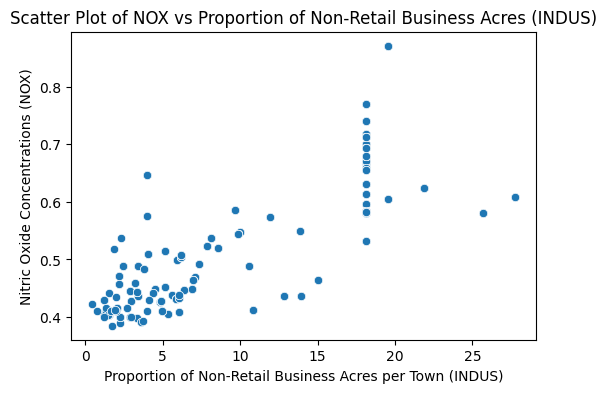

In [8]:

# Create a scatter plot for Nitric Oxide Concentrations (NOX) vs Proportion of Non-Retail Business Acres (INDUS)
plt.figure(figsize=(6, 4))  # Optional: set the figure size
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

# Customize plot
plt.title("Scatter Plot of NOX vs Proportion of Non-Retail Business Acres (INDUS)")
plt.xlabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
plt.ylabel("Nitric Oxide Concentrations (NOX)")

# Show the plot
plt.show()

FINDINGS:

The scatter plot shows a positive correlation between the proportion of non-retail business acres per town (INDUS) and nitric oxide concentrations  (NOX). This suggests that as the proportion of non-retail business acres increases, the level of nitric oxide in the air also tends to increase.   


#### Q5
##### Create a histogram for the pupil to teacher ratio variable
##### Create a histogram for the pupil-to-teacher ratio (PTRATIO)

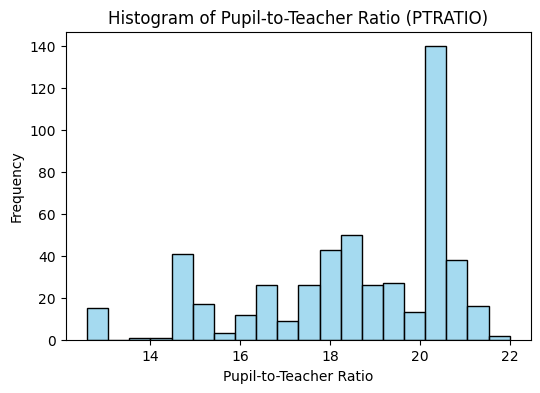

In [9]:

plt.figure(figsize=(6, 4))  # Optional: set the figure size
sns.histplot(boston_df['PTRATIO'], bins=20, kde=False, color='skyblue', edgecolor='black')

# Customize plot
plt.title("Histogram of Pupil-to-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-to-Teacher Ratio")
plt.ylabel("Frequency")

# Show the plot
plt.show()

FINDINGS:

From the histogram, we can see data appears to be right-skewed, meaning there are more observations with lower PTRATIO values. It also suggests a generally favorable distribution of PTRATIO with a tendency towards lower values.

### Task 3 : Use the appropriate tests to answer the questions provided

#### Q1 - Is there a significant difference in median value of houses bounded by the Charles river or not? 
##### (T-test for independent samples)


In [10]:

# Split the data based on the 'CHAS' variable (whether the house is near the Charles River or not)
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group1, group0)

# Hypothesis testing
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in median values."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in median values."

t_stat, p_value, conclusion

(3.996437466090509,
 7.390623170519905e-05,
 'Reject the null hypothesis: There is a significant difference in median values.')

#### Q2 - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


In [11]:

# Perform ANOVA test 
f_stat, p_value = stats.f_oneway(boston_df[boston_df['AGE_GROUP'] == "35 and younger"]['MEDV'],
                                  boston_df[boston_df['AGE_GROUP'] == "35 to 70"]['MEDV'],
                                  boston_df[boston_df['AGE_GROUP'] == "70 and older"]['MEDV'])
# Hypothesis testing
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in median values."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in median values."

f_stat, p_value, conclusion


(36.40764999196599,
 1.7105011022702984e-15,
 'Reject the null hypothesis: There is a significant difference in median values.')

#### Q3 - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
##### (Pearson Correlation)

In [12]:
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Hypothesis testing
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant linear relationship between NOX and INDUS."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant linear relationship between NOX and INDUS."

correlation, p_value, conclusion

(0.7636514469209192,
 7.913361061210442e-98,
 'Reject the null hypothesis: There is a significant linear relationship between NOX and INDUS.')

#### Q4 - What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes? 
### (Regression analysis)

In [13]:
# Define the independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
results.summary()

# Hypothesis testing: If the p-value for the coefficient of 'DIS' is less than alpha, we reject the null hypothesis
alpha = 0.05
if results.pvalues['DIS'] < alpha:
    conclusion = "Reject the null hypothesis: Weighted distance to employment centers significantly impacts the median value of homes."
else:
    conclusion = "Fail to reject the null hypothesis: Weighted distance to employment centers does not significantly impact the median value of homes."

results.pvalues['DIS'], conclusion

(1.2066117273372235e-08,
 'Reject the null hypothesis: Weighted distance to employment centers significantly impacts the median value of homes.')